In [1]:
import json
from model_api import eval_metric_model, yagpt_summarization, yagpt_lite, yagpt_alpha
from post_process import post_process_yagpt_summarization, post_process_yagpt_lite
from tqdm import tqdm
import numpy as np
import time

iam_token = 't1.9euelZqZyI-Rk5Gbiouak8aMx8_Ik-3rnpWaz42dm4uLzouOlsfMypLLyZfl8_cWLx9U-e8VEz4r_d3z91ZdHFT57xUTPiv9zef1656VmpbHzpnNm5bOlJLLjZSNjY3P7_zF656VmpbHzpnNm5bOlJLLjZSNjY3P.IeBKxXTkKJDtD6q0bD90L9eyWXavaoXqyl3xBEW5ibhsF-ZtSp7Y6si8cRTBBznBHonjjaZYhp5XYXxtH_G6BA'

In [2]:
with open('test_articles_clear_100.json', 'r') as fin:
    test_articles = [json.loads(s) for s in fin.readlines()]

## YaGPT Summarization

In [8]:
output_file = 'test_results_yagpt_summarization.json'
skip = 0
n_generations = 1
sleep_time = 5

def generation_fn(article):
    summary = yagpt_summarization(article, iam_token, temperature=0.1)
    summary = post_process_yagpt_summarization(summary)
    return summary


results = []

In [10]:
skip = len(results)
print(f"Skip={skip}")
print(f"Total data samples={len(test_articles)}")

with open(output_file, 'a') as f:
    for idx, sample in enumerate(tqdm(test_articles, position=0)):
        if idx < skip:
            continue
        
        # make N generations to statistically estimate the quality
        eval_scores = []
        summaries = []
        for _ in range(n_generations):
            article = sample['Text']

            try:
                summary = generation_fn(article)
                eval_score = eval_metric_model(article, summary)
            except AssertionError as e:
                print(e)
                time.sleep(60)
                summary = generation_fn(article)
                eval_score = eval_metric_model(article, summary)

            eval_scores.append(eval_score)
            summaries.append(summary)
            time.sleep(sleep_time)

        # calculate mean and std
        mean = np.mean(eval_scores)
        std = np.std(eval_scores)

        result = {
            'idx': idx,
            'id': sample.get('id', None),
            'eval_scores': eval_scores,
            'summaries': summaries,
            'mean': mean,
            'std': std,
        }

        f.write(json.dumps(result, ensure_ascii=False, indent=2) + '\n')
        f.flush()

        results.append(result)

        # print(f"Eval score stats: {idx=}, {mean=}, {std=}")

Skip=0
Total data samples=100


  1%|          | 1/100 [00:10<17:41, 10.72s/it]

Eval score stats: idx=0, mean=0.458984, std=0.0


  2%|▏         | 2/100 [00:18<14:59,  9.18s/it]

Eval score stats: idx=1, mean=0.385986, std=0.0


  3%|▎         | 3/100 [00:28<15:33,  9.62s/it]

Eval score stats: idx=2, mean=0.600586, std=0.0


  4%|▍         | 4/100 [00:38<15:24,  9.63s/it]

Eval score stats: idx=3, mean=0.493652, std=0.0


  5%|▌         | 5/100 [00:48<15:13,  9.61s/it]

Eval score stats: idx=4, mean=0.640625, std=0.0


  6%|▌         | 6/100 [00:57<15:07,  9.66s/it]

Eval score stats: idx=5, mean=0.619141, std=0.0


  7%|▋         | 7/100 [01:07<14:54,  9.62s/it]

Eval score stats: idx=6, mean=0.649902, std=0.0


  8%|▊         | 8/100 [01:15<14:08,  9.23s/it]

Eval score stats: idx=7, mean=0.483643, std=0.0


  9%|▉         | 9/100 [01:25<14:12,  9.37s/it]

Eval score stats: idx=8, mean=0.652344, std=0.0


 10%|█         | 10/100 [01:33<13:17,  8.86s/it]

Eval score stats: idx=9, mean=0.657227, std=0.0


 11%|█         | 11/100 [01:41<12:42,  8.57s/it]

Eval score stats: idx=10, mean=0.401123, std=0.0


 12%|█▏        | 12/100 [01:49<12:16,  8.37s/it]

Eval score stats: idx=11, mean=0.412842, std=0.0


 13%|█▎        | 13/100 [01:58<12:43,  8.77s/it]

Eval score stats: idx=12, mean=0.572266, std=0.0


 14%|█▍        | 14/100 [02:06<12:18,  8.59s/it]

Eval score stats: idx=13, mean=0.60791, std=0.0


 15%|█▌        | 15/100 [02:17<12:52,  9.09s/it]

Eval score stats: idx=14, mean=0.604492, std=0.0
Error: 429, {"error":{"grpcCode":8,"httpCode":429,"message":"ai.textGenerationCompletionSessionsCount.count gauge quota limit exceed: allowed 3 requests","httpStatus":"Too Many Requests","details":[]}}


 16%|█▌        | 16/100 [03:25<37:39, 26.90s/it]

Eval score stats: idx=15, mean=0.620605, std=0.0


 17%|█▋        | 17/100 [03:35<30:03, 21.72s/it]

Eval score stats: idx=16, mean=0.611328, std=0.0


 18%|█▊        | 18/100 [03:42<23:50, 17.45s/it]

Eval score stats: idx=17, mean=0.62793, std=0.0


 19%|█▉        | 19/100 [03:49<19:26, 14.41s/it]

Eval score stats: idx=18, mean=0.583008, std=0.0


 20%|██        | 20/100 [03:58<16:42, 12.53s/it]

Eval score stats: idx=19, mean=0.575684, std=0.0


 21%|██        | 21/100 [04:06<14:55, 11.33s/it]

Eval score stats: idx=20, mean=0.543457, std=0.0


 22%|██▏       | 22/100 [04:16<14:02, 10.81s/it]

Eval score stats: idx=21, mean=0.620117, std=0.0


 23%|██▎       | 23/100 [04:26<13:34, 10.58s/it]

Eval score stats: idx=22, mean=0.605469, std=0.0


 24%|██▍       | 24/100 [04:36<13:04, 10.33s/it]

Eval score stats: idx=23, mean=0.510254, std=0.0


 25%|██▌       | 25/100 [04:44<12:11,  9.75s/it]

Eval score stats: idx=24, mean=0.650879, std=0.0


 26%|██▌       | 26/100 [04:53<11:57,  9.70s/it]

Eval score stats: idx=25, mean=0.329102, std=0.0


 27%|██▋       | 27/100 [05:02<11:23,  9.36s/it]

Eval score stats: idx=26, mean=0.652832, std=0.0


 28%|██▊       | 28/100 [05:11<10:54,  9.09s/it]

Eval score stats: idx=27, mean=0.559082, std=0.0


 29%|██▉       | 29/100 [05:19<10:27,  8.83s/it]

Eval score stats: idx=28, mean=0.611816, std=0.0


 30%|███       | 30/100 [05:29<10:55,  9.37s/it]

Eval score stats: idx=29, mean=0.55957, std=0.0


 31%|███       | 31/100 [05:39<10:56,  9.52s/it]

Eval score stats: idx=30, mean=0.488281, std=0.0


 32%|███▏      | 32/100 [05:48<10:23,  9.16s/it]

Eval score stats: idx=31, mean=0.677734, std=0.0


 33%|███▎      | 33/100 [05:55<09:47,  8.77s/it]

Eval score stats: idx=32, mean=0.604004, std=0.0


 34%|███▍      | 34/100 [06:06<10:20,  9.41s/it]

Eval score stats: idx=33, mean=0.663574, std=0.0


 35%|███▌      | 35/100 [06:15<09:50,  9.09s/it]

Eval score stats: idx=34, mean=0.69873, std=0.0


 36%|███▌      | 36/100 [06:22<09:13,  8.65s/it]

Eval score stats: idx=35, mean=0.671875, std=0.0


 37%|███▋      | 37/100 [06:30<08:42,  8.29s/it]

Eval score stats: idx=36, mean=0.552734, std=0.0


 38%|███▊      | 38/100 [06:37<08:18,  8.04s/it]

Eval score stats: idx=37, mean=0.593262, std=0.0


 39%|███▉      | 39/100 [06:47<08:42,  8.57s/it]

Eval score stats: idx=38, mean=0.580566, std=0.0


 40%|████      | 40/100 [06:57<08:59,  8.99s/it]

Eval score stats: idx=39, mean=0.403564, std=0.0


 41%|████      | 41/100 [07:10<09:59, 10.16s/it]

Eval score stats: idx=40, mean=0.538086, std=0.0


 42%|████▏     | 42/100 [07:20<09:43, 10.06s/it]

Eval score stats: idx=41, mean=0.546387, std=0.0


 43%|████▎     | 43/100 [07:29<09:25,  9.92s/it]

Eval score stats: idx=42, mean=0.637695, std=0.0


 44%|████▍     | 44/100 [07:40<09:33, 10.24s/it]

Eval score stats: idx=43, mean=0.558594, std=0.0


 45%|████▌     | 45/100 [07:51<09:27, 10.32s/it]

Eval score stats: idx=44, mean=0.629883, std=0.0


 46%|████▌     | 46/100 [07:59<08:46,  9.74s/it]

Eval score stats: idx=45, mean=0.364014, std=0.0


 47%|████▋     | 47/100 [08:08<08:15,  9.35s/it]

Eval score stats: idx=46, mean=0.688477, std=0.0


 48%|████▊     | 48/100 [08:16<07:48,  9.01s/it]

Eval score stats: idx=47, mean=0.54248, std=0.0


 49%|████▉     | 49/100 [08:26<08:00,  9.43s/it]

Eval score stats: idx=48, mean=0.321777, std=0.0


 50%|█████     | 50/100 [08:35<07:38,  9.17s/it]

Eval score stats: idx=49, mean=0.594727, std=0.0


 51%|█████     | 51/100 [08:45<07:42,  9.44s/it]

Eval score stats: idx=50, mean=0.687012, std=0.0


 52%|█████▏    | 52/100 [08:53<07:09,  8.95s/it]

Eval score stats: idx=51, mean=0.694824, std=0.0


 53%|█████▎    | 53/100 [09:04<07:28,  9.54s/it]

Eval score stats: idx=52, mean=0.708984, std=0.0


 54%|█████▍    | 54/100 [09:12<06:56,  9.05s/it]

Eval score stats: idx=53, mean=0.393311, std=0.0


 55%|█████▌    | 55/100 [09:19<06:30,  8.69s/it]

Eval score stats: idx=54, mean=0.59668, std=0.0


 56%|█████▌    | 56/100 [09:29<06:38,  9.05s/it]

Eval score stats: idx=55, mean=0.55957, std=0.0


 57%|█████▋    | 57/100 [09:39<06:37,  9.24s/it]

Eval score stats: idx=56, mean=0.617676, std=0.0


 58%|█████▊    | 58/100 [09:47<06:11,  8.84s/it]

Eval score stats: idx=57, mean=0.673828, std=0.0


 59%|█████▉    | 59/100 [09:55<05:48,  8.50s/it]

Eval score stats: idx=58, mean=0.683594, std=0.0


 60%|██████    | 60/100 [10:03<05:37,  8.44s/it]

Eval score stats: idx=59, mean=0.630371, std=0.0


 61%|██████    | 61/100 [10:13<05:45,  8.85s/it]

Eval score stats: idx=60, mean=0.511719, std=0.0


 62%|██████▏   | 62/100 [10:23<05:49,  9.20s/it]

Eval score stats: idx=61, mean=0.314697, std=0.0


 63%|██████▎   | 63/100 [10:34<06:05,  9.89s/it]

Eval score stats: idx=62, mean=0.600586, std=0.0
Error: 429, {"error":{"grpcCode":8,"httpCode":429,"message":"ai.textGenerationCompletionSessionsCount.count gauge quota limit exceed: allowed 3 requests","httpStatus":"Too Many Requests","details":[]}}


 64%|██████▍   | 64/100 [11:42<16:19, 27.22s/it]

Eval score stats: idx=63, mean=0.545898, std=0.0


 65%|██████▌   | 65/100 [11:51<12:39, 21.69s/it]

Eval score stats: idx=64, mean=0.303223, std=0.0


 66%|██████▌   | 66/100 [11:58<09:55, 17.52s/it]

Eval score stats: idx=65, mean=0.598145, std=0.0


 67%|██████▋   | 67/100 [12:07<08:07, 14.78s/it]

Eval score stats: idx=66, mean=0.40918, std=0.0


 68%|██████▊   | 68/100 [12:15<06:49, 12.80s/it]

Eval score stats: idx=67, mean=0.669922, std=0.0


 69%|██████▉   | 69/100 [12:25<06:07, 11.86s/it]

Eval score stats: idx=68, mean=0.641602, std=0.0


 70%|███████   | 70/100 [12:32<05:19, 10.66s/it]

Eval score stats: idx=69, mean=0.377686, std=0.0


 71%|███████   | 71/100 [12:41<04:50, 10.02s/it]

Eval score stats: idx=70, mean=0.506836, std=0.0


 72%|███████▏  | 72/100 [12:49<04:22,  9.38s/it]

Eval score stats: idx=71, mean=0.752441, std=0.0


 73%|███████▎  | 73/100 [12:58<04:14,  9.43s/it]

Eval score stats: idx=72, mean=0.588379, std=0.0


 74%|███████▍  | 74/100 [13:07<03:58,  9.18s/it]

Eval score stats: idx=73, mean=0.589844, std=0.0


 75%|███████▌  | 75/100 [13:16<03:44,  8.99s/it]

Eval score stats: idx=74, mean=0.708008, std=0.0


 76%|███████▌  | 76/100 [13:24<03:29,  8.71s/it]

Eval score stats: idx=75, mean=0.526367, std=0.0


 77%|███████▋  | 77/100 [13:36<03:44,  9.76s/it]

Eval score stats: idx=76, mean=0.484863, std=0.0


 78%|███████▊  | 78/100 [13:46<03:35,  9.78s/it]

Eval score stats: idx=77, mean=0.591309, std=0.0


 79%|███████▉  | 79/100 [13:54<03:14,  9.27s/it]

Eval score stats: idx=78, mean=0.646484, std=0.0
Error: 429, {"error":{"grpcCode":8,"httpCode":429,"message":"ai.textGenerationCompletionSessionsCount.count gauge quota limit exceed: allowed 3 requests","httpStatus":"Too Many Requests","details":[]}}


 80%|████████  | 80/100 [15:02<08:58, 26.92s/it]

Eval score stats: idx=79, mean=0.607422, std=0.0


 81%|████████  | 81/100 [15:12<06:56, 21.92s/it]

Eval score stats: idx=80, mean=0.641602, std=0.0


 82%|████████▏ | 82/100 [15:22<05:27, 18.20s/it]

Eval score stats: idx=81, mean=0.434082, std=0.0


 83%|████████▎ | 83/100 [15:31<04:25, 15.65s/it]

Eval score stats: idx=82, mean=0.608398, std=0.0
Error: 429, {"error":{"grpcCode":8,"httpCode":429,"message":"ai.textGenerationCompletionSessionsCount.count gauge quota limit exceed: allowed 3 requests","httpStatus":"Too Many Requests","details":[]}}


 84%|████████▍ | 84/100 [16:38<08:17, 31.08s/it]

Eval score stats: idx=83, mean=0.208008, std=0.0


 85%|████████▌ | 85/100 [16:49<06:13, 24.87s/it]

Eval score stats: idx=84, mean=0.521484, std=0.0


 86%|████████▌ | 86/100 [16:57<04:36, 19.78s/it]

Eval score stats: idx=85, mean=0.67627, std=0.0


 87%|████████▋ | 87/100 [17:06<03:37, 16.75s/it]

Eval score stats: idx=86, mean=0.51709, std=0.0


 88%|████████▊ | 88/100 [17:17<02:57, 14.80s/it]

Eval score stats: idx=87, mean=0.346191, std=0.0


 89%|████████▉ | 89/100 [17:26<02:26, 13.28s/it]

Eval score stats: idx=88, mean=0.443359, std=0.0


 90%|█████████ | 90/100 [17:36<02:01, 12.19s/it]

Eval score stats: idx=89, mean=0.688965, std=0.0


 91%|█████████ | 91/100 [17:46<01:43, 11.53s/it]

Eval score stats: idx=90, mean=0.610352, std=0.0


 92%|█████████▏| 92/100 [17:55<01:25, 10.63s/it]

Eval score stats: idx=91, mean=0.489014, std=0.0


 93%|█████████▎| 93/100 [18:02<01:08,  9.78s/it]

Eval score stats: idx=92, mean=0.616211, std=0.0


 94%|█████████▍| 94/100 [18:12<00:59,  9.90s/it]

Eval score stats: idx=93, mean=0.493652, std=0.0


 95%|█████████▌| 95/100 [18:21<00:46,  9.37s/it]

Eval score stats: idx=94, mean=0.628906, std=0.0


 96%|█████████▌| 96/100 [18:29<00:35,  9.00s/it]

Eval score stats: idx=95, mean=0.644531, std=0.0


 97%|█████████▋| 97/100 [18:39<00:28,  9.46s/it]

Eval score stats: idx=96, mean=0.432129, std=0.0


 98%|█████████▊| 98/100 [18:48<00:18,  9.13s/it]

Eval score stats: idx=97, mean=0.642578, std=0.0


 99%|█████████▉| 99/100 [18:55<00:08,  8.63s/it]

Eval score stats: idx=98, mean=0.662598, std=0.0


100%|██████████| 100/100 [19:04<00:00, 11.44s/it]

Eval score stats: idx=99, mean=0.550781, std=0.0


In [10]:
with open('test_results_yagpt_summarization.json', 'r') as fin:
    results = []
    lines = []
    for line in fin.readlines():
        lines.append(line)
        if line.strip('\n') == '}':
            results.append(json.loads(''.join(lines)))
            lines = []
results

[{'idx': 0,
  'id': 1,
  'eval_scores': [0.458984],
  'summaries': ['Интервью с главой ЦМИТ Иваном Мошкиным о его компании LAB3DPrint. LAB3DPrint предоставляет обучение в области 3D-моделирования, 3D-печати, робототехники и 2D-черчения. Компания использует современное оборудование для производства 3D-прототипов и лазерной резки. В прошлом году компания начала поставки 3D-принтеров Raise3D в Россию. Иван Мошкин, создатель и руководитель LAB3DPrint, обсудил впечатления о модели Raise3D N2 Plus Dual. Преимущества принтера включают наличие собственной аккумуляторной батареи, тихую работу и возможность изменения параметров печати во время печати. LAB3DPrint использует Raise3D N2 Plus Dual для прототипирования крупных моделей и изготовления протезов, ортезов и медицинских изделий. Компания предлагает курсы по 3D-прототипированию, 3D-печати, лазерному сканированию и инженерному дизайну CAD. LAB3DPrint также предлагает 10 преимуществ для своих клиентов, включая Trade In, гарантию, техническую 

In [13]:
scores = [r['mean'] for r in results]
np.mean(scores)

0.56334962

(array([ 1.,  0.,  0.,  2.,  2.,  2.,  3.,  4.,  3.,  1.,  7.,  5., 11.,
         5., 18., 13., 10.,  9.,  3.,  1.]),
 array([0.208008  , 0.23522965, 0.2624513 , 0.28967295, 0.3168946 ,
        0.34411625, 0.3713379 , 0.39855955, 0.4257812 , 0.45300285,
        0.4802245 , 0.50744615, 0.5346678 , 0.56188945, 0.5891111 ,
        0.61633275, 0.6435544 , 0.67077605, 0.6979977 , 0.72521935,
        0.752441  ]),
 <BarContainer object of 20 artists>)

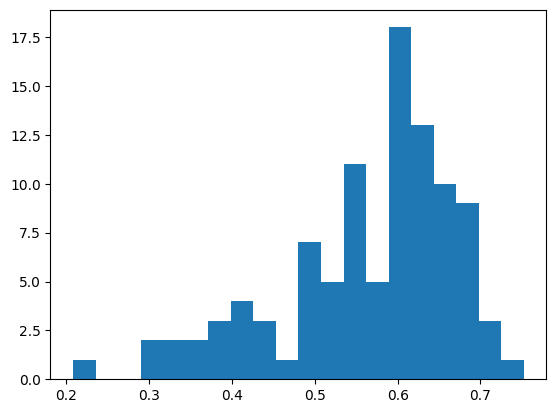

In [14]:
from matplotlib import pyplot as plt
plt.hist(scores, bins=20)

In [16]:
# get first item with mean score < 0.3
for r in results:
    if r['mean'] < 0.3:
        print(r['idx'])
        print(r['mean'])
        print(r['summaries'][0])
        break

83
0.208008
Автор переехал в другой регион Испании и не нашел стоящей барахолки. Переключился на онлайн-покупки для собственных нужд и развития скилла. Купил четыре фотоаппарата на точке сбора нерабочей электроники. Первый фотоаппарат: Panasonic DMC-LS2, полностью рабочая камера.


In [25]:
# trnasform sentences to rows
s = r['summaries'][0].replace('. ', '.\n- ')
print(s)
eval_metric_model(test_articles[83]["Text"], s)

Автор переехал в другой регион Испании и не нашел стоящей барахолки.
- Переключился на онлайн-покупки для собственных нужд и развития скилла.
- Купил четыре фотоаппарата на точке сбора нерабочей электроники.
- Первый фотоаппарат: Panasonic DMC-LS2, полностью рабочая камера.


0.21228

## YaGPT-lite

In [28]:
import model_api
s = model_api.yagpt_lite(test_articles[83]["Text"], iam_token, temperature=0.1)
print(s)

1. Испанцы выбрасывают рабочие фотоаппараты, включая модели от Nikon и Panasonic.
2. Некоторые фотоаппараты имеют проблемы с объективами или другими деталями.
3. Испанцы могут продавать свои фотоаппараты на онлайн-барахолках или другим людям, которые могут их купить.
4. Испанцы могут также отремонтировать или использовать свои фотоаппараты для других целей.
5. Автор планирует рассказать о другой покупке в следующей статье.


In [32]:
from post_process import post_process_yagpt_lite
eval_metric_model(test_articles[83]["Text"], post_process_yagpt_lite(s))

0.540527